In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('Data/50_Startups.csv')  #reading data
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [17]:
x = df.iloc[:,:-1].values # independent var
y = df.iloc[:,-1].values  # dependent var

df = df.drop("Profit" , axis = 1)  #we have dropped dependent var column from dataframe

In [18]:
df = pd.get_dummies(df)
x = df.iloc[:,:].values #reassigning indepencdent vart after onehotencoding
# NOTE : we cpould have encoded previous assigned x using sklearn on mayrix...but its a bit cumbersome
    # so we have used panda to encode by already removing dependent var columns
    

In [19]:
# now to avoid dummy var trap we need to remove one dummy var
"""x = x[:,:-1]
x"""
#many time we need to do it mannualy as above...but sklearn library already 
#takes care of dummy variable trap in case of regression


#splitting train sets
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size=0.2,random_state=51)

In [20]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression();
regressor.fit(x_train , y_train)  #fitting regression model to x_train and y_train 
y_pred = regressor.predict(x_test)   # the predicted value for x_test is rest
y_pred    

array([172564.19138489,  55000.77644157,  47168.7923094 , 148740.09030906,
       193427.09948833, 131760.33027104, 104168.9428804 , 100177.41602972,
       118849.45793391, 182050.58478965])

In [21]:
z = y_pred - y_test
z = z/y_test       #relative error
err = z *100
err.mean() #this could show approx mean error

8.702321923541959

In [22]:
mse = z*z
rms = mse.mean()
rms = np.sqrt(rms)
print(rms*100)

18.31246215922362


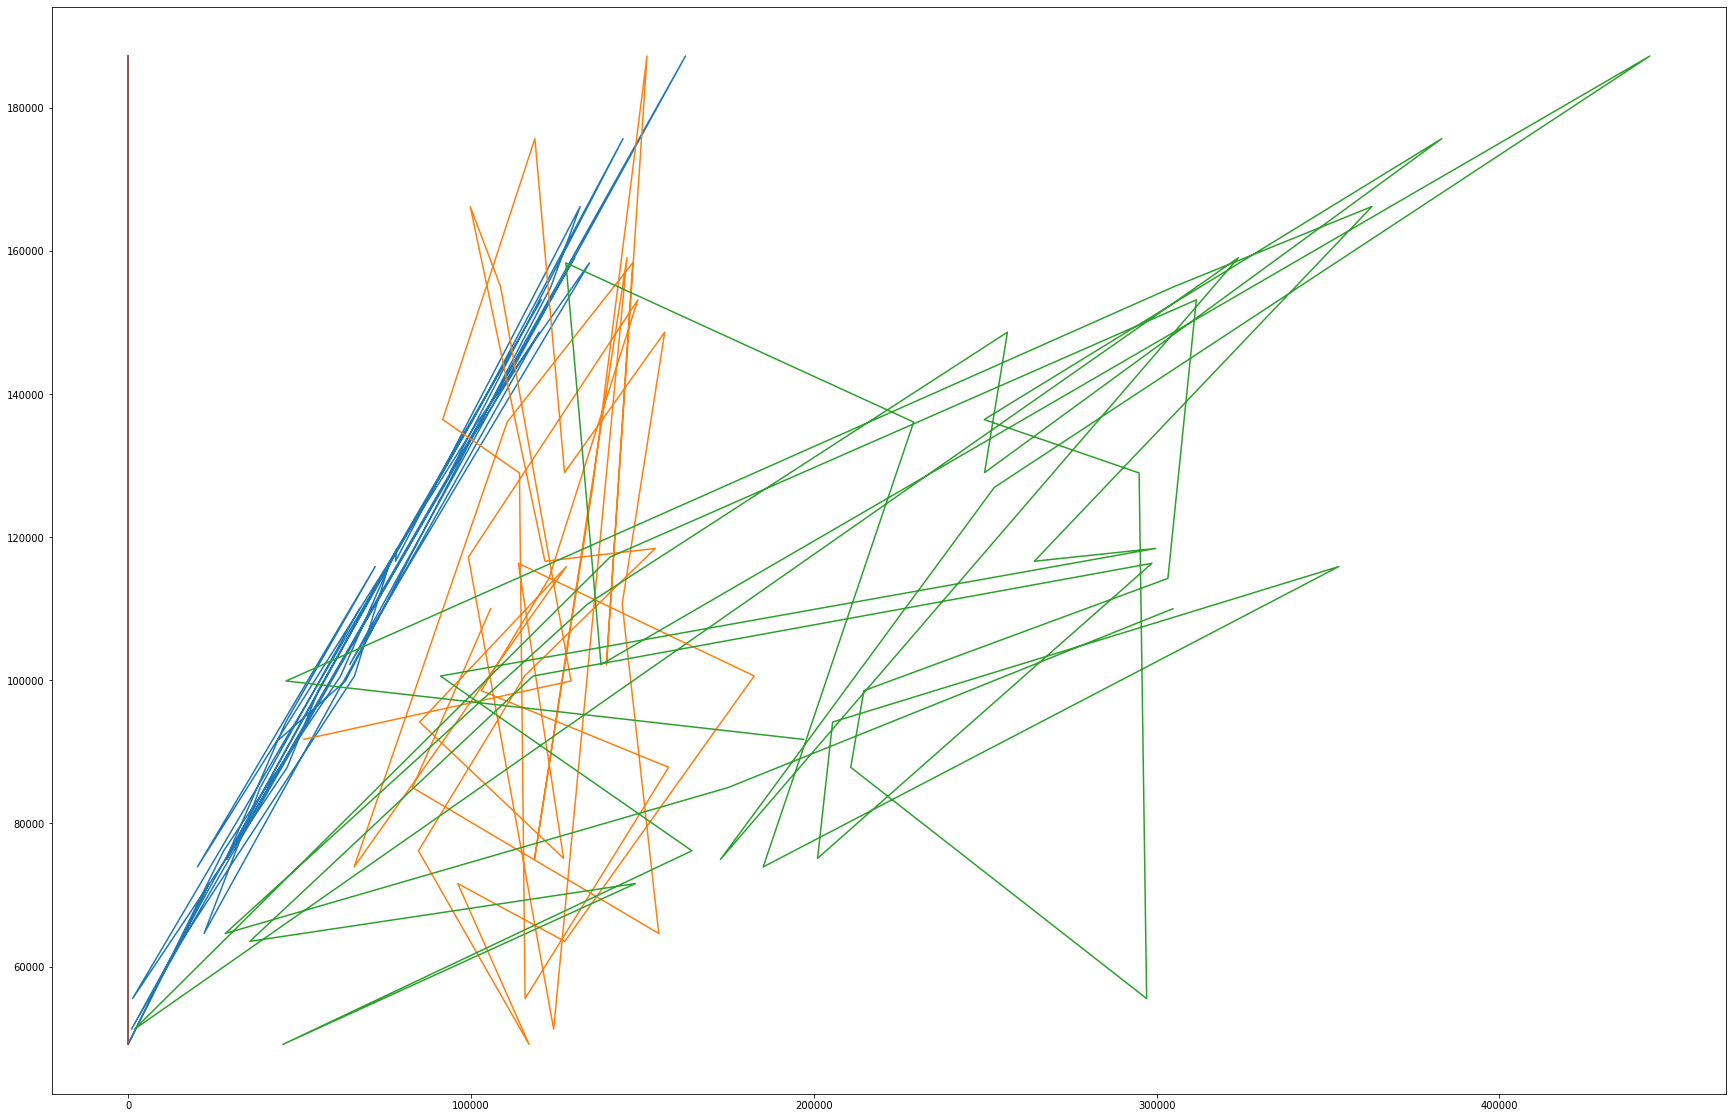

In [29]:
plt.rcParams["figure.figsize"] = (30,20)
#plt.scatter(x , y , color="red")
plt.plot(x_train,regressor.predict(x_train))

In [8]:
# now we eill implement multiple linear regress using backtrackng
# most variable used from below will be in uppercase to show  diff model

DF = df;
Y = y;
X = DF.iloc[:,:].values
#now adding a first column of all 1 to X
#  DF.info()  can be used to find out no. of rows
X = np.append(arr = np.ones((50,1),dtype='int') , values = X , axis = 1)
X = X.astype('int')

In [9]:
import statsmodels.regression.linear_model as sm
X_opt = X[: ,[0,1,2,3,4,5]]
new_regressor = sm.OLS(endog = Y,exog = X_opt)
result = new_regressor.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     169.9
Date:                Sun, 22 Sep 2019   Prob (F-statistic):           1.34e-27
Time:                        20:08:35   Log-Likelihood:                -525.38
No. Observations:                  50   AIC:                             1063.
Df Residuals:                      44   BIC:                             1074.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.008e+04   6952.617      7.204      0.0

In [10]:
#######################################
X_opt = X[: ,[0,1,3,4,5]]
new_regressor = sm.OLS(endog = Y,exog = X_opt)
result = new_regressor.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     215.8
Date:                Sun, 22 Sep 2019   Prob (F-statistic):           9.73e-29
Time:                        20:08:35   Log-Likelihood:                -525.53
No. Observations:                  50   AIC:                             1061.
Df Residuals:                      45   BIC:                             1071.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.694e+04   3342.605     14.043      0.0

In [11]:
#######################################
X_opt = X[: ,[0,1,3]]
new_regressor = sm.OLS(endog = Y,exog = X_opt)
result = new_regressor.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     450.8
Date:                Sun, 22 Sep 2019   Prob (F-statistic):           2.16e-31
Time:                        20:08:36   Log-Likelihood:                -525.54
No. Observations:                  50   AIC:                             1057.
Df Residuals:                      47   BIC:                             1063.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.698e+04   2689.941     17.464      0.0

In [12]:
#Now our new model should be bulid with X_opt
X_train , X_test , Y_train , Y_test = train_test_split(X_opt , Y ,test_size = 0.2 , random_state=51 )

In [13]:
newRegressor = LinearRegression()
newRegressor = newRegressor.fit(X_train , Y_train)
Y_predicted = newRegressor.predict(X_test)

In [14]:
#now checking error 
Z = Y_predicted - Y_test
Z = Z/Y_test
print(Z.mean()*100)    #average error

6.735077785173746


In [15]:
Mserr = Z*Z
Rmserror = Mserr.mean()
Rms = np.sqrt(Rmserror)
print(Rms*100) #rms error

13.811116003768081


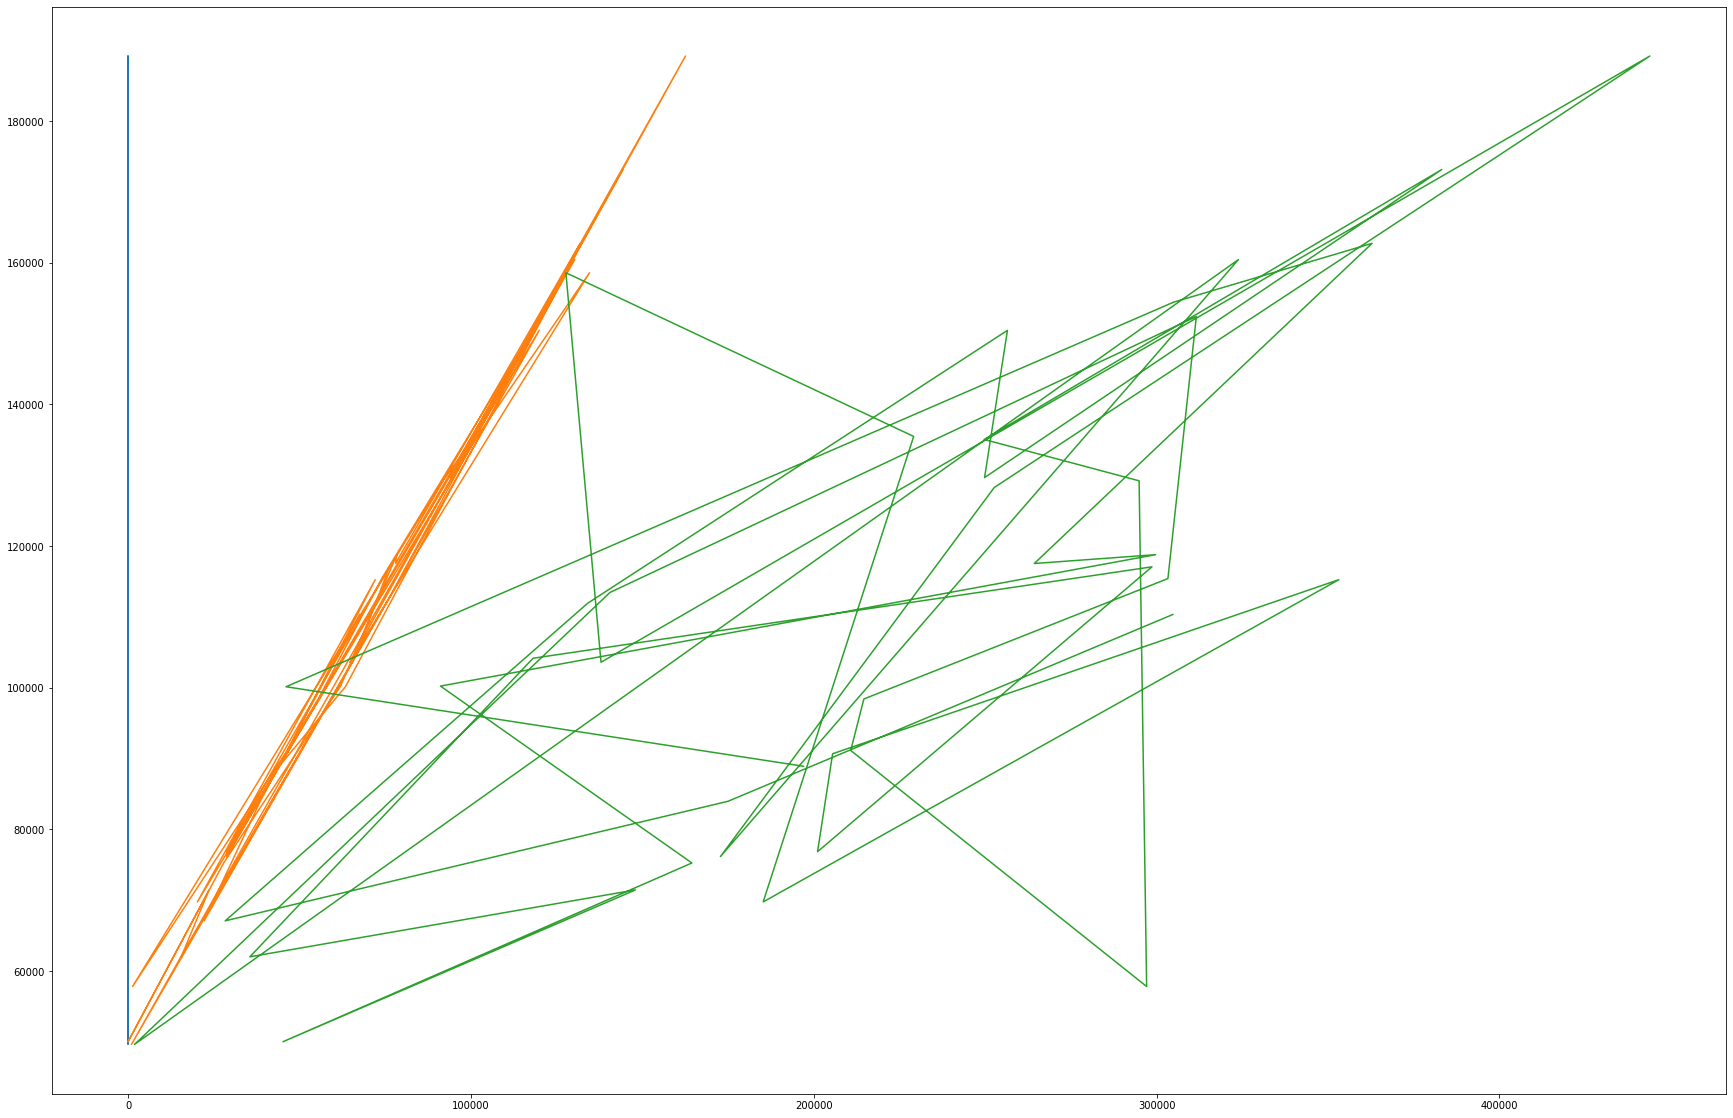

In [31]:
plt.rcParams["figure.figsize"] = (30,20)
#plt.scatter(x , y , color="red")
plt.plot(X_train,newRegressor.predict(X_train))